<a href="https://colab.research.google.com/github/marialuisamartins/PosGrad_Data_Analytics_FIAP/blob/main/AnaliseExploratoriaDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 1: Data Analysis and Exploration

## Análise Exploratória de Dados

### Aula 1 - Aquisição e leitura de dados reais (Produção Hospitalar)

In [ ]:
"""
De onde vem os dados:
Site DataSUS > TabNet > Assistência à Saúde > Produção Hospitalar (SIH/SUS) >
Dados Consolidados AIH (RD), por local de internação, a partir de 2008 >
Abrangência Geográfica: Brasil por Região e Unidade de Federação

*IH - Internação Hospitalar

Seleção:
Linha - Unidade da Federação
Coluna - Ano/mês atendimento e de processamento (serão geradas essas duas tabelas)
Conteúdo - Valor total
Períodos disponíveis - Janeiro de 2008 a Setembro de 2021 (data do vídeo da aula)

COPIA COMO .CSV - Faz o download (fazer para as duas abas)

"""

'\nDe onde vem os dados:\nSite DataSUS > TabNet > Assistência à Saúde > Produção Hospitalar (SIH/SUS) >\nDados Consolidados AIH (RD), por local de internação, a partir de 2008 >\nAbrangência Geográfica: Brasil por Região e Unidade de Federação\n\n*IH - Internação Hospitalar\n\nSeleção:\nLinha - Unidade da Federação\nColuna - Ano/mês atendimento e de processamento (serão geradas essas duas tabelas)\nConteúdo - Valor total\nPeríodos disponíveis - Janeiro de 2008 a Setembro de 2021 (data do vídeo da aula)\n\nCOPIA COMO .CSV - Faz o download (fazer para as duas abas)\n\n'

In [ ]:
# A tabela de atendimento começa com dados de 1992 a de processamento começa de 2008, por que?

In [ ]:
import pandas as pd

In [ ]:
dadosProcessamento = pd.read_csv('/content/Processamento_Hospitalar.csv', encoding="ISO-8859=1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")

# Essa variável dados é um DataFrame

# skip rows pra pular as primeiras 3 linhas de cabeçalho
# sep para considerar ponto e vírgula o separador
# skip footer para apagar as linhas "inúteis" no fim do arquivo, sem o total inclusive
# thousands para indicar a separação dos milhares com ponto e não vírgula
# decimal para separar decimais por vírgula

# Documentação para ajudar: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html



<ipython-input-356-0b1494588840>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dadosProcessamento = pd.read_csv('/content/Processamento_Hospitalar.csv', encoding="ISO-8859=1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")


In [ ]:
dadosProcessamento.head()

# traz as 5 primeiras linhas

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,13767058.64,11273846.83,12443977.87,13054654.77,11274549.92,12082214.04,11392759.99,9603361.10,10516070.26,1394262146.50
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,4845006.75,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,-,587778407.94
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,21710028.09,22198453.04,24809424.63,25005960.66,17522338.72,19613290.58,18387673.59,14265257.60,15065867.12,2613559191.21
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,4435042.77,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,2868626.39,2077360.03,2164371.02,451170144.15
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,46925899.02,45938305.83,54094884.03,50116544.12,51268388.79,50646320.52,55501176.43,54223823.56,43689467.84,6322687933.44


In [ ]:
dadosProcessamento.tail()

# traz as 5 últimas linhas

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,112385822.04,113809028.30,116985178.63,120027121.08,116546657.80,122325557.64,114892531.95,114464874.02,120732038.67,16750147966.65
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,26973943.11,26354221.47,26569066.08,27768462.56,28200723.03,26783833.64,27456434.20,26922668.28,23959476.62,3219624366.70
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,23431985.13,24728541.29,24130933.81,22608901.38,23329871.28,22552033.63,22790096.76,19782985.94,21462469.97,2988456549.66
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,50235627.95,44674462.22,53622374.91,51008354.28,49885683.22,50434366.44,47764974.85,50332961.30,47555420.60,6682627768.18
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,27495227.73,28258576.00,29034177.33,30961244.28,31610313.47,29140330.80,30810835.09,29465293.81,31878001.55,3543027009.96


In [ ]:
# médias por mês
dadosProcessamento.mean()

<ipython-input-359-743391ece280>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dadosProcessamento.mean()


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2023/Set     65189094.24
2023/Out     66941705.27
2023/Nov     65725826.24
2023/Dez     65537138.18
Total      8578342381.93
Length: 192, dtype: float64

In [ ]:
# visão geral do dataframe
dadosProcessamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 195 entries, Unidade da Federação to Total
dtypes: float64(192), object(3)
memory usage: 41.3+ KB


In [ ]:
# para impedir a saída que está em notação científica (ex.: +07)
pd.options.display.float_format = "{:.2f}".format

In [ ]:
# novos valores de média pós formatação
dadosProcessamento.mean()

<ipython-input-362-a4e636a7795d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dadosProcessamento.mean()


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2023/Set     65189094.24
2023/Out     66941705.27
2023/Nov     65725826.24
2023/Dez     65537138.18
Total      8578342381.93
Length: 192, dtype: float64

In [ ]:
# Desafio - mostrar a coluna mais recente de todas, independente de qual ela for
dadosProcessamento['2023/Dez']

# Isso resulta numa série de valores
# tentei fazer com janeiro de 2024, mas tinha um valor nulo então não dava pra trabalhar com ela

0      9603361.10
1      3503827.09
2     14265257.60
3      2077360.03
4     54223823.56
5      4021077.83
6     10074562.93
7     40847676.30
8     21650742.95
9     63542964.03
10    29155981.54
11    35767071.98
12    85366310.97
13    20482951.60
14    15601529.83
15    94377498.92
16   219072249.00
17    41166956.08
18   132738171.12
19   383374712.92
20   155479759.04
21    92140100.99
22   114464874.02
23    26922668.28
24    19782985.94
25    50332961.30
26    29465293.81
Name: 2023/Dez, dtype: float64

In [ ]:
# Uma forma de trabalhar com a série gerada - média de valor por estado
dadosProcessamento['2023/Jan'].mean()

59734715.98814815

In [ ]:
# Bônus
# Se eu quisesse mais de uma coluna
dadosProcessamento.loc[:,['2023/Dez', '2024/Jan']]

,2023/Dez,2024/Jan
0,9603361.10,10516070.26
1,3503827.09,-
2,14265257.60,15065867.12
3,2077360.03,2164371.02
4,54223823.56,43689467.84
5,4021077.83,3961035.17
6,10074562.93,426805.38
7,40847676.30,37885708.46
8,21650742.95,20541206.34
9,63542964.03,61814810.50


In [ ]:
# Se eu quisesse só algumas linhas dessas colunas (ex.: linhas 0 a 3)
dadosProcessamento.loc[0:3,['2023/Dez', '2024/Jan']]

,2023/Dez,2024/Jan
0,9603361.10,10516070.26
1,3503827.09,-
2,14265257.60,15065867.12
3,2077360.03,2164371.02


### Aula 2 - Primeiras Visualizações de Dados

<Axes: xlabel='Unidade da Federação'>

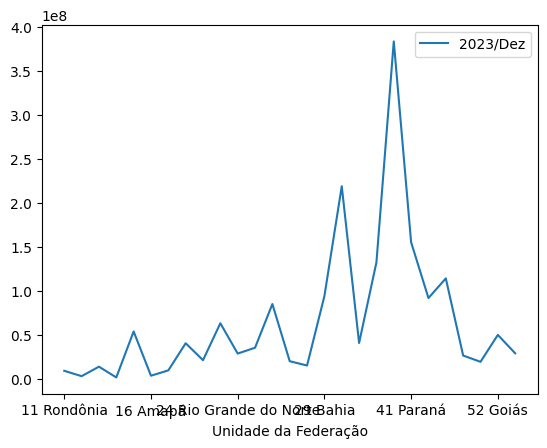

In [ ]:
# o pandas tem imbutida a biblioteca matplotlib, que usaremos a seguir

dadosProcessamento.plot(x="Unidade da Federação", y="2023/Dez")

# gera um gráfico de linha, mas não existem valores entre os dois pontos, que são os estados, não faz sentido

Text(0.5, 1.0, 'Valor por unidade da federação')

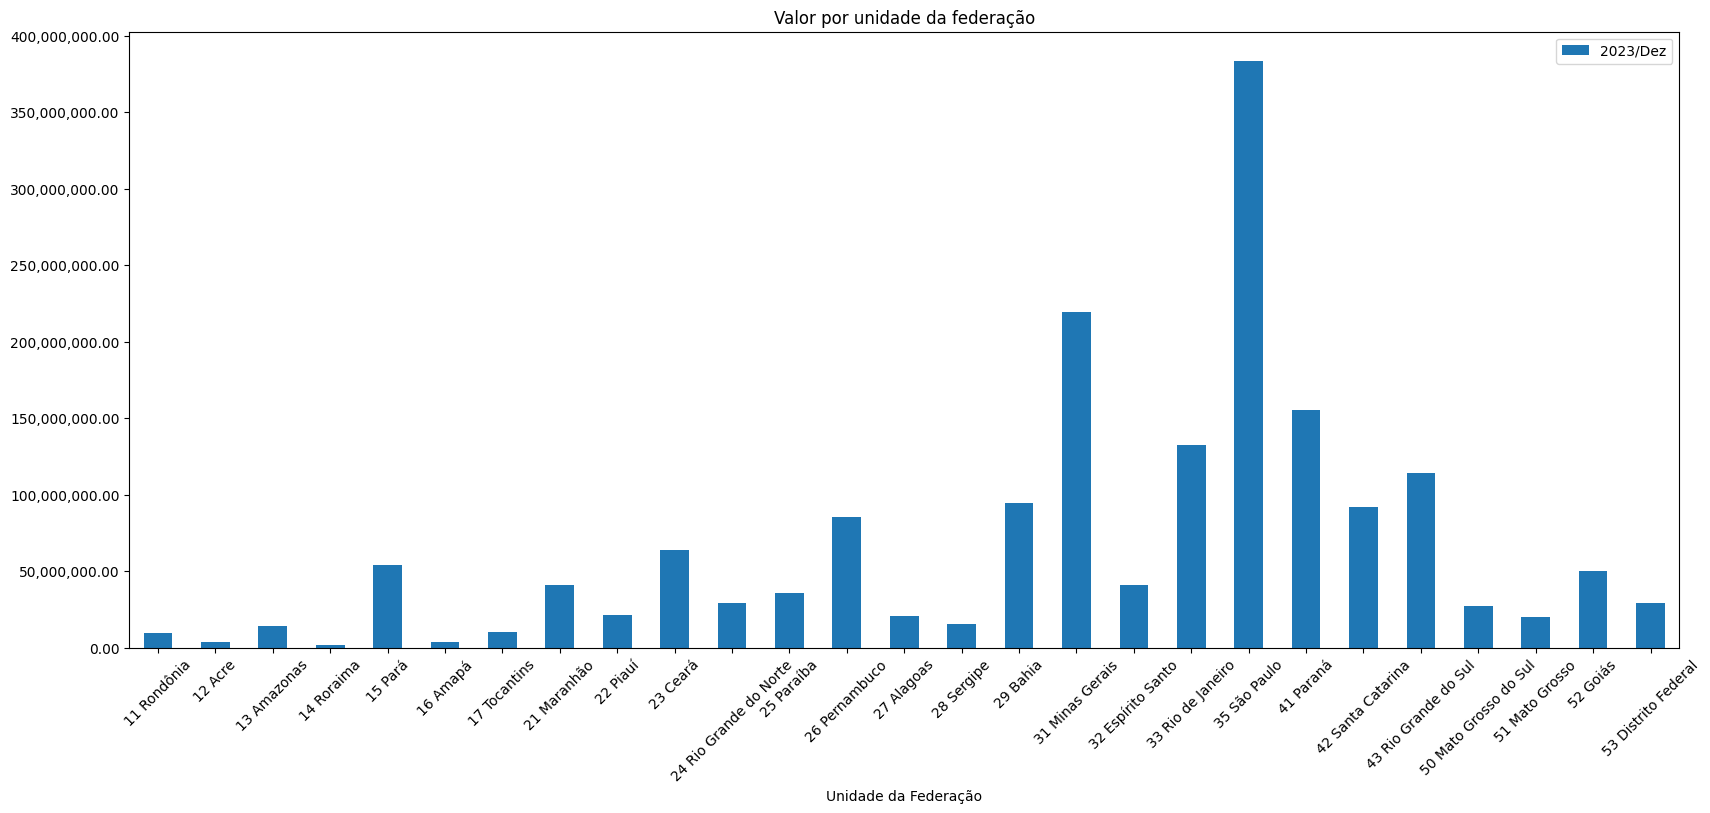

In [ ]:
# Estilizando o gráfico

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

axis = dadosProcessamento.plot(x="Unidade da Federação", y="2023/Dez", kind="bar", figsize=(20,8))

# Desafio - colocar os nomes dos estados em 45º para melhor leitura
axis.xaxis.set_tick_params(rotation=45)
# fonte: https://matplotlib.org/stable/gallery/ticks/date_demo_rrule.html#sphx-glr-gallery-ticks-date-demo-rrule-py

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")

### Aula 3 - Análise Exploratória de Dados

In [ ]:
dadosAtendimento = pd.read_csv('/content/Atendimento_Hospitalar.csv', encoding="ISO-8859=1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")

# dados de atendimento, que ao invés de processamento, vem desde 1992 com vários meses "vazios" (-)

<ipython-input-369-5e0dc0896a54>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dadosAtendimento = pd.read_csv('/content/Atendimento_Hospitalar.csv', encoding="ISO-8859=1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")


In [ ]:
dadosAtendimento[['2008/Ago', '2008/Set']].head()

# mais de um mês, tem que usar uma lista, que fica entre colchetes

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [ ]:
dadosAtendimento.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30,2434117.87,1394262146.50
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40,-,587778407.94
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28,4838198.31,2613559191.21
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44,41945.05,451170144.15
4,15 Pará,-,-,-,-,-,-,-,-,-,...,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74,13610385.98,6322687933.44


In [ ]:
# selecionando quais colunas quero utilizar - não pode ter nulos

#pegando todos os nomes das colunas
dadosAtendimento.columns

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2023/Mai', '2023/Jun', '2023/Jul', '2023/Ago', '2023/Set', '2023/Out',
       '2023/Nov', '2023/Dez', '2024/Jan', 'Total'],
      dtype='object', length=321)

In [ ]:
dadosAtendimento.mean()

# começa em Agosto de 2007 porque só pega média de onde não tem valores nulos
# isso retorna uma série dos meses que tem todos os valores
# o índice desse retorno é o que interessa

<ipython-input-373-979e30a3339e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dadosAtendimento.mean()


2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2023/Set     63959268.28
2023/Out     64657967.71
2023/Nov     57001423.07
2023/Dez     45043722.01
Total      8578335035.65
Length: 198, dtype: float64

In [ ]:
dadosAtendimento.mean().index

<ipython-input-374-b0ac7be40a4c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dadosAtendimento.mean().index


Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2023/Abr', '2023/Mai', '2023/Jun', '2023/Jul', '2023/Ago', '2023/Set',
       '2023/Out', '2023/Nov', '2023/Dez', 'Total'],
      dtype='object', length=198)

In [ ]:
dadosAtendimento.mean().index.tolist()

<ipython-input-375-e150840383b6>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dadosAtendimento.mean().index.tolist()


['2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',

In [ ]:
# essa lista agora vira uma seleção pros meus dados
colunas_usaveis = dadosAtendimento.mean().index.tolist()

# inserir a coluna que tem o nome dos distritos
colunas_usaveis.insert(0, "Unidade da Federação")

# imprime os 5 primeiros elementos de uma lista de python (NÃO SÉRIE), não dá pra usar .head()
colunas_usaveis[:5]

<ipython-input-376-bb1ac2c29ee7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  colunas_usaveis = dadosAtendimento.mean().index.tolist()


['Unidade da Federação', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov']

In [ ]:
# gerando a tabela com dados usáveis

dados_usaveis = dadosAtendimento[colunas_usaveis]

dados_usaveis.head()

# Séries sempre tem: um índice e um vetor de valores
# listas tem apenas um único vetor de valores

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,12460222.12,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30,1394262146.50
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4400113.11,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40,587778407.94
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,21147835.83,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28,2613559191.21
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,4659152.88,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44,451170144.15
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,48219884.00,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74,6322687933.44


In [ ]:
# Não quero o índice 0 1 2 3, quero que meu índice sejam as unidades da federação

dados_usaveis = dados_usaveis.set_index("Unidade da Federação")

dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,12460222.12,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30,1394262146.50
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4400113.11,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40,587778407.94
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,21147835.83,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28,2613559191.21
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,4659152.88,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44,451170144.15
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,48219884.00,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74,6322687933.44


In [ ]:
#exemplo do resultado
dados_usaveis["2019/Ago"].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [ ]:
dados_usaveis.loc["12 Acre"]
# .loc é a busca pelo índice
# colchete sozinho é busca pela coluna

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2023/Set     4329288.81
2023/Out     4071963.23
2023/Nov     3233614.21
2023/Dez     1394717.40
Total      587778407.94
Name: 12 Acre, Length: 198, dtype: float64

In [ ]:
dados_usaveis.iloc[1]
# buscando a segunda linha pelo contador usando a função .iloc[], que também é do Acre, retorna os mesmos resultados

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2023/Set     4329288.81
2023/Out     4071963.23
2023/Nov     3233614.21
2023/Dez     1394717.40
Total      587778407.94
Name: 12 Acre, Length: 198, dtype: float64

<Axes: xlabel='Unidade da Federação'>

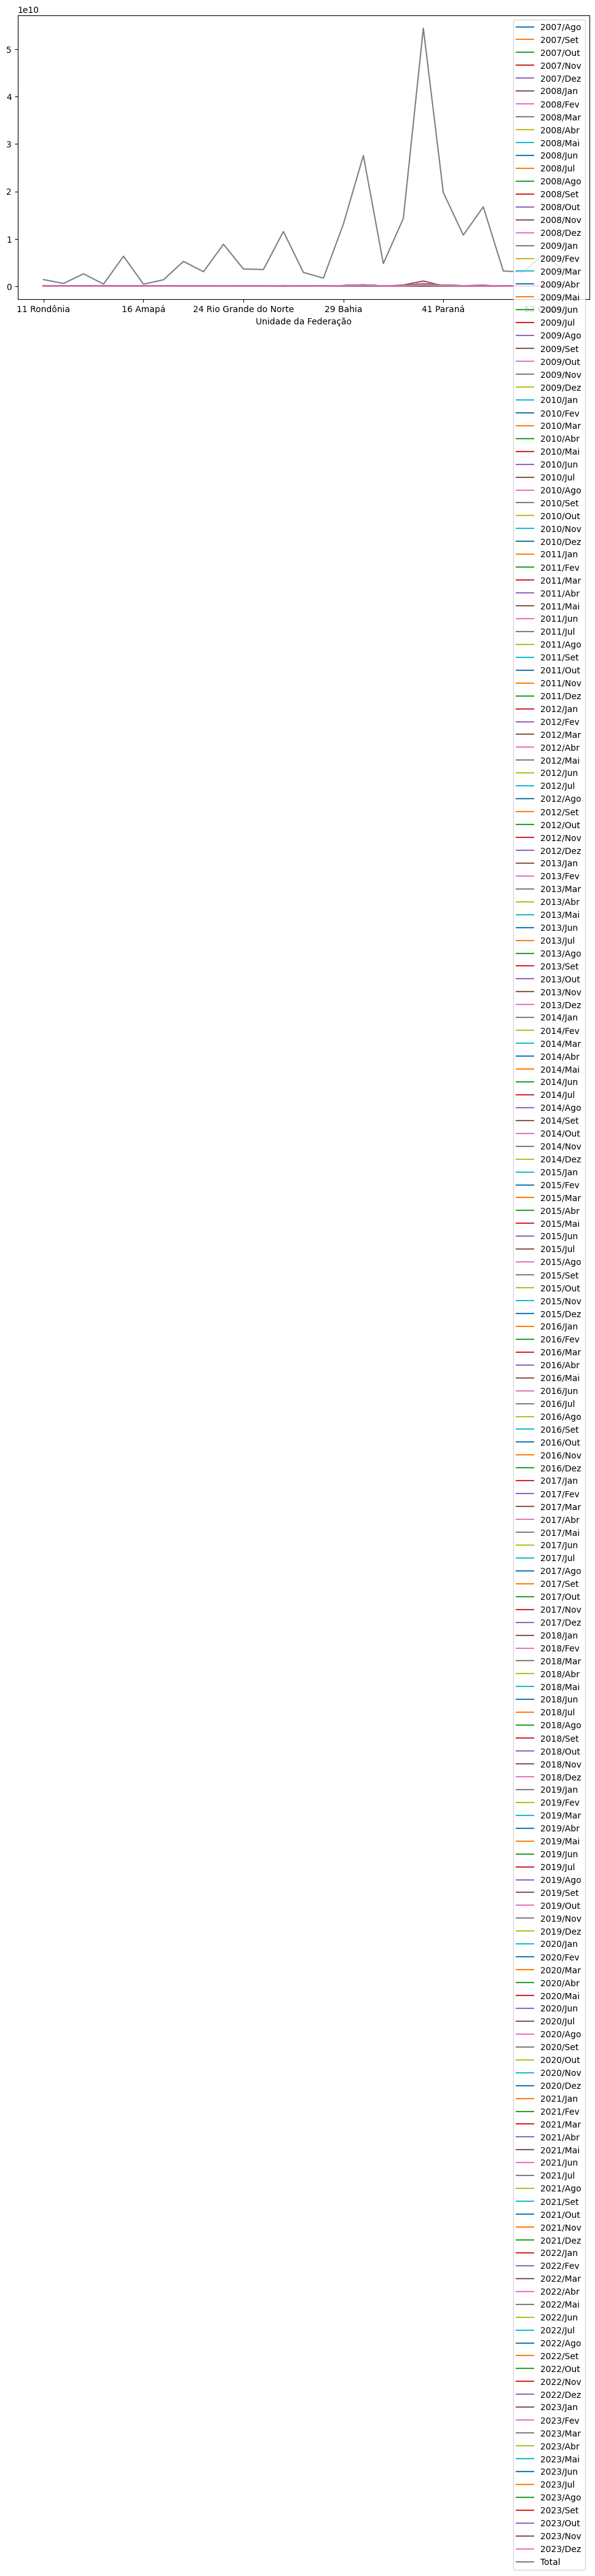

In [ ]:
# plotando

dados_usaveis.plot(figsize=(12,6))

# plotando sem parâmetros, pra cada coluna (mês) ele plotou uma linha com cor diferente

In [ ]:
# não faz sentido uma série por estado, e sim uma série temporal (x é tempo e y os estados)

# pra isso vamos transpor uma matriz (T)

dados_usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


<Axes: >

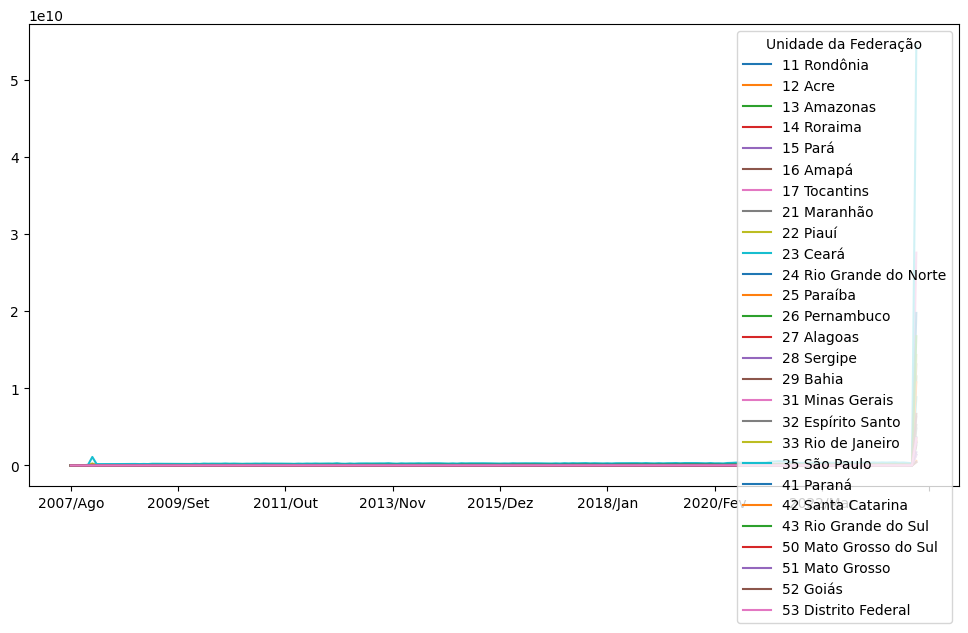

In [ ]:
dados_usaveis.T.plot(figsize=(12,6))

# ficou com um salto gigante no final das datas (é o Total que acabou ficando muito maior)

In [ ]:
# aqui o total ainda está, como podemos ver

dados_usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2023/Set,12068445.93,4329288.81,16686364.04,2362582.36,51714821.84,3331263.48,9629774.49,40399651.12,23745716.86,63072515.00,...,40478673.23,122532382.59,362854888.92,152226546.07,88811503.07,114019622.04,25897790.89,22424730.11,48040227.82,29636228.70
2023/Out,10814659.45,4071963.23,17051515.93,1585002.57,51237171.71,3543500.85,6722881.55,39865036.47,22878158.31,64716508.58,...,41809848.79,127245165.17,374629976.37,151522479.20,89924700.23,116187553.64,24356440.44,21572148.20,47989959.81,29776844.99
2023/Nov,7839878.93,3233614.21,14725982.12,165184.76,49646581.93,3052663.75,5032974.30,33146563.03,19415247.34,54152759.50,...,35767904.73,110293990.40,335486802.01,136377606.71,80434789.80,101723680.10,17975196.66,18757993.99,45180102.56,27785666.95
2023/Dez,4969181.30,1394717.40,11345788.28,91360.44,32989201.74,2768546.16,2582404.81,23303880.58,15246017.28,39043483.57,...,27677906.02,85884256.01,289203731.18,108392132.04,59848379.26,79016335.07,11104710.76,13608235.28,35603860.42,22830282.42
Total,1394262146.50,587778407.94,2613559191.21,451170144.15,6322687933.44,434057663.03,1364198743.40,5245996055.35,3055504906.18,8854791965.38,...,4784325123.75,14318869113.09,54440115497.18,19763419297.81,10780033131.67,16750147966.65,3219624366.70,2988456549.66,6682626416.14,3543027009.96


In [ ]:
# vamos dropar o total

# axis 0 busca nas linhas
# para colunas usamos axis 1
# aqui não usamos T

dados_usaveis = dados_usaveis.drop("Total", axis=1)

dados_usaveis.tail()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,119704904.74,107919440.17,119911799.35,114180633.26,114821469.38,120841672.92,114019622.04,116187553.64,101723680.10,79016335.07
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,27070737.55,24987397.07,27012124.81,25980327.81,27408836.70,27761038.69,25897790.89,24356440.44,17975196.66,11104710.76
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,...,23311478.85,21859985.36,24470787.76,22929285.47,23550934.50,24243689.65,22424730.11,21572148.20,18757993.99,13608235.28
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,80007952.86,18149374.27,20992213.03,21049477.30,19162546.79,...,49993226.20,46474788.48,50134061.74,47935572.72,49412906.09,49763873.98,48040227.82,47989959.81,45180102.56,35603860.42
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,28980515.22,28463928.34,29919839.16,28337591.67,29544407.37,30864169.80,29636228.70,29776844.99,27785666.95,22830282.42


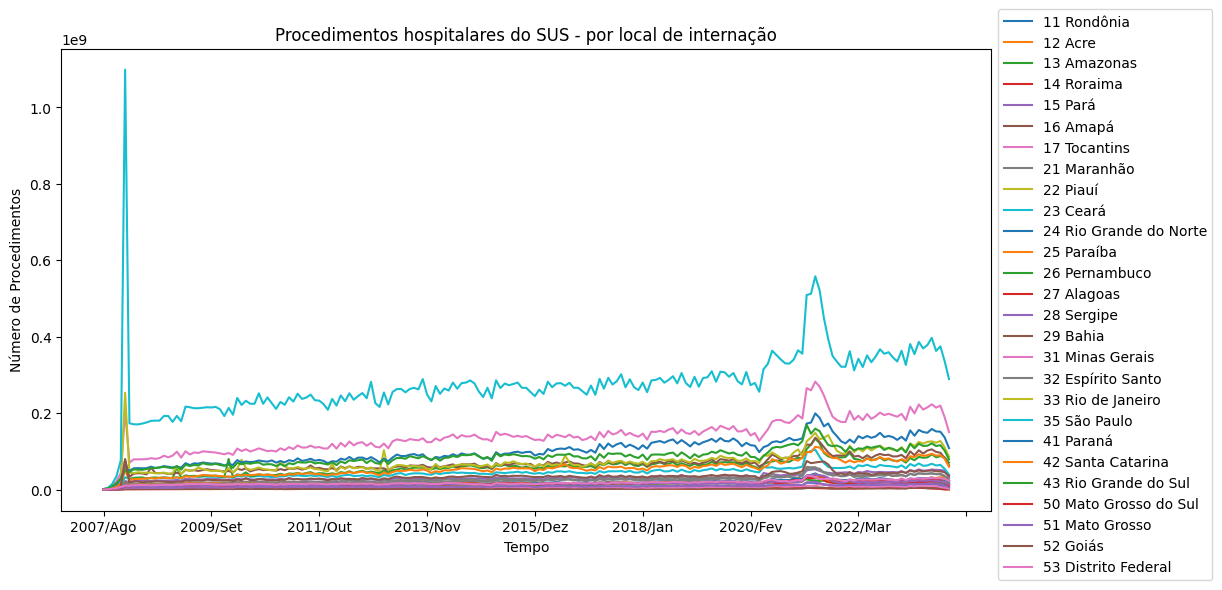

In [ ]:
dados_usaveis.T.plot(figsize=(12,6))

# Desafio 1 - reposicionar a legenda
# desafio 2 - retocar a visualização (dar nome pros eixos, título, etc)

plt.title("Procedimentos hospitalares do SUS - por local de internação")
plt.xlabel('Tempo')
plt.ylabel('Número de Procedimentos')
plt.legend(bbox_to_anchor=(1, 1.1), loc='upper left')

In [ ]:
# as cores são recicladas a cada 10 repetições, é impossível diferenciar a olho nu essas cores

dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,12294890.40,12460222.12,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4660970.89,4400113.11,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,20916455.27,21147835.83,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,5138823.17,4659152.88,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,50953053.21,48219884.00,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74


In [ ]:
dados_usaveis.T.columns[:5]
# é o mesmo que pegar o índice com dados_usaveis.index.tolist_

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [ ]:
dados_usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [ ]:
dados_usaveis[:5]
# aqui ele retorna linhas ao invés de colunas

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,12294890.40,12460222.12,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4660970.89,4400113.11,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,20916455.27,21147835.83,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,5138823.17,4659152.88,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,50953053.21,48219884.00,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74


<Axes: >

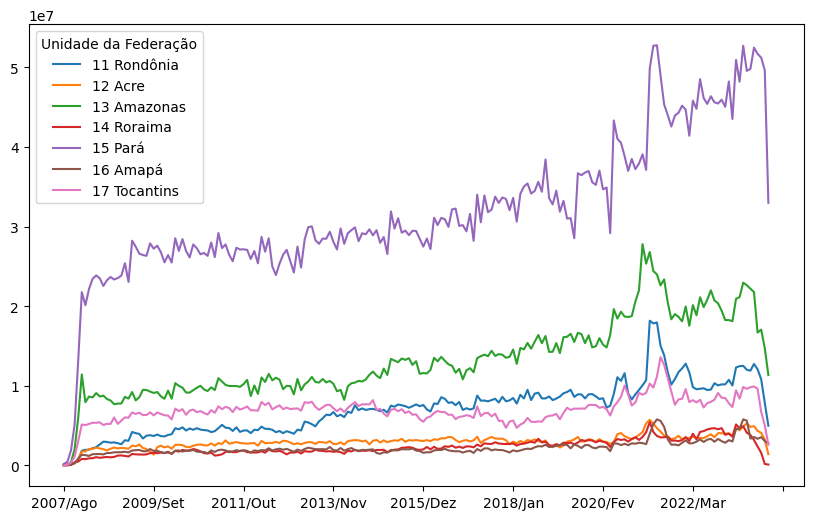

In [ ]:
dados_usaveis[:7].T.plot(figsize=(10,6))

# 7 primeiras linhas, transpostas e plotadas

In [ ]:
# escolhendo uma amostra aleatoria dos nossos dados

dados_usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,20916455.27,21147835.83,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28
27 Alagoas,104243.75,174024.90,595544.54,1125396.73,2564966.65,16752223.79,8112220.30,9210505.56,10466691.94,9844096.03,...,18868698.82,17712151.59,19989080.82,19640578.44,20139988.88,21022398.58,20422904.93,21483146.58,18186413.26,14217157.62
23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,...,66942075.12,61665313.14,68367984.61,62197447.26,63288492.32,67637597.39,63072515.00,64716508.58,54152759.50,39043483.57
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,28980515.22,28463928.34,29919839.16,28337591.67,29544407.37,30864169.80,29636228.70,29776844.99,27785666.95,22830282.42
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,41981809.80,38767723.99,43179230.48,40733853.91,41223811.54,42930850.56,40478673.23,41809848.79,35767904.73,27677906.02
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1098866284.75,173518271.93,170871122.49,170591864.96,172732776.61,...,380675682.67,354544684.13,386515192.31,369420874.89,378210221.65,397095635.88,362854888.92,374629976.37,335486802.01,289203731.18
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,...,23311478.85,21859985.36,24470787.76,22929285.47,23550934.50,24243689.65,22424730.11,21572148.20,18757993.99,13608235.28


In [ ]:
dados_usaveis.sample(frac = 0.1)
# 10% de amostragem

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,76783410.11,33410124.06,41390189.36,42826993.62,42159447.09,...,100041097.28,89986678.49,102912686.46,94297040.65,102100395.68,105351782.67,98629226.08,96323451.91,82159987.14,63597562.30
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,40977333.48,37720583.93,42107180.54,41608384.22,41589508.81,41901513.18,40399651.12,39865036.47,33146563.03,23303880.58
25 Paraíba,97352.78,368130.43,1002088.64,2149873.40,5448177.36,16599004.84,10871589.62,12348758.14,12680965.13,13258411.71,...,26455201.21,25608560.61,27755853.91,26911662.03,29740088.51,30801193.05,30401990.26,32470904.31,29967383.44,22919821.02


<Axes: >

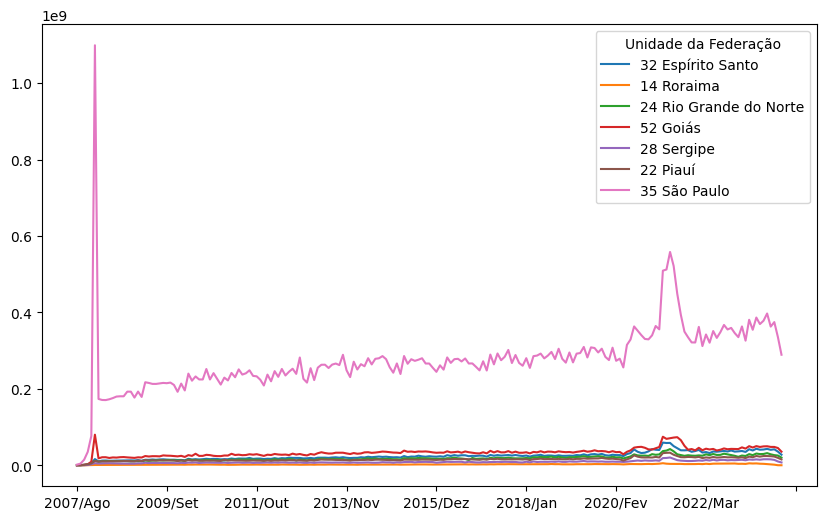

In [ ]:
dados_usaveis.sample(7).T.plot(figsize=(10,6))

In [ ]:
# algoritmo pseudo aleatório (pseudo randomness)

# ex.: número aleatório - 8231 = seed escolhida pelo programador
# regra/formula : (semente/10) * (3/2)

(8231/10)*(3/2)

# a semente agora é 1234.65
# e por ai vai

1234.65

In [ ]:
import numpy as np

np.random.seed(524387) # é costume usar o número 42 ou 0
dados_7_estados = dados_usaveis.sample(7)

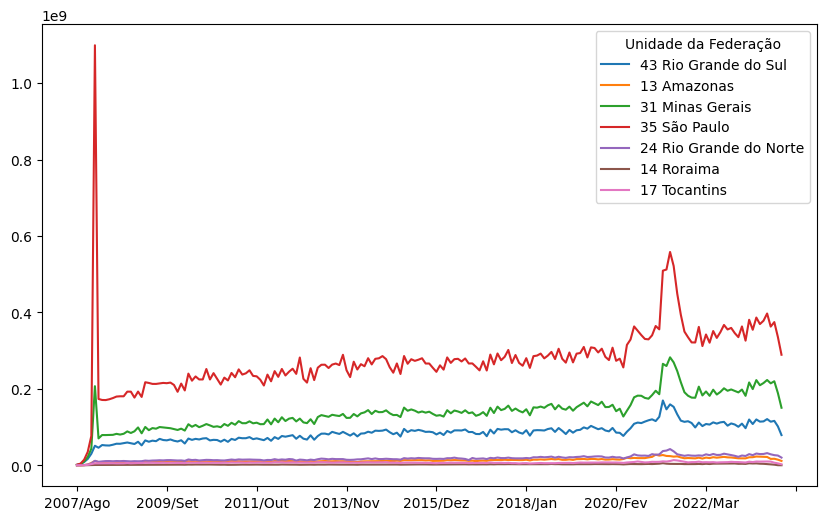

In [ ]:
dados_7_estados = dados_usaveis.sample(n=7).T.plot(figsize=(10,6))

# não retornam os mesmos estados da tabela, já que na linha anterior ele retornou os primeiros 7 aleatórios
# a cada vez que rodar serão 7 aleatórios, porém sempre que rodar a primeira vez, serão aqueles
# e sempre que rodar uma segunda vez, com essa mesma seed, serão esses

In [ ]:
# voltar com o total, mas por estado

# quero somar nas colunas e não nas linhas, então usamos sum(1)
dados_usaveis["Total"] = dados_usaveis.sum(1)

dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,12460222.12,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30,1391827424.30
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4400113.11,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40,587777124.12
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,21147835.83,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28,2608718161.49
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,4659152.88,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44,451127785.41
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,48219884.00,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74,6309059011.86


In [ ]:
# Desafio 3 - Ordenar o dataframe com base no total
# Desafio 4 - Adicionar uma coluna com a região de cada estado
# Desafio 5 - Adicione o seu estado nessa lista de 7 estados (dados_7_estados)

#### Von Neumann - Middle Square Method

In [ ]:
seed = 150 # escolha minha, variável global

def middle_square():
  global seed #informa que estamos usando a variável seed como global
  result = seed * seed
  result = str(result).zfill(8) # transforma em string e adiciona zeros no fim pra somar 8 casas
  result = result[2:-2] # pegar o meio, retirando as duas primeiras e duas últimas
  result = int(result)
  seed = result
  return seed

In [ ]:
print(middle_square())
print(middle_square())
print(middle_square())
print(middle_square())
print(middle_square())

225
506
2560
5536
6472


In [ ]:
from tqdm import tqdm # barra de progresso, são muitos números, tem que usar função array do numpy

def test_random_generator(pseudo_random_generator):
  results = np.array([middle_square() for i in tqdm(range(1000000))])
  results = pd.DataFrame(np.array([results]).T, columns=["Value"])
  print(results.mean())
  results.plot(kind='hist')
  plt.show()
  display(results.value_counts().head())

100%|██████████| 1000000/1000000 [00:00<00:00, 1007501.67it/s]


Value   5099.99
dtype: float64


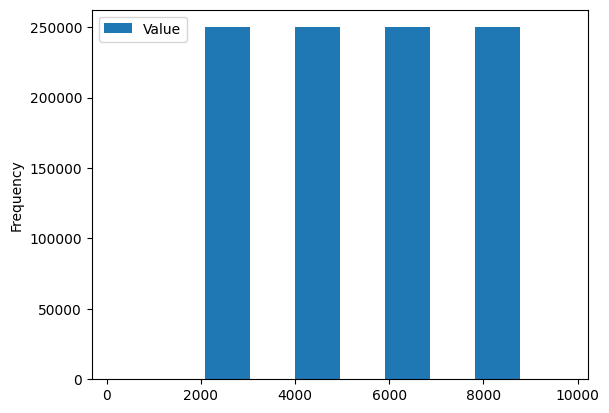

Value
6100     249989
4100     249988
8100     249988
2100     249988
166           1
dtype: int64

In [ ]:
seed = 8912
test_random_generator(middle_square)

# independente do seed, os números 2100, 4100, 6100 e 8100 são os que mais aparecem

In [ ]:
print(seed)
print(middle_square())
print(seed)
print(middle_square())
print(seed)
print(middle_square())
print(seed)
print(middle_square())

# gerou um ciclo de tamanho 4 que volta para ele mesmo, então a distribuição não fica uniforme
# se eu quero 10 mil números, o ciclo deveria ser de 10 mil, sempre precisará repetir
# disso não tem como fugir

6100
2100
2100
4100
4100
8100
8100
6100


In [ ]:
# CONTINUAR NO VÍDEO https://youtu.be/NuQIJcEOjBY
# Depois ver a terceira parte da aula 3